Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


0: Object (DummyInterface): Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1: CE1 (CementedElement): CementedElement: [1, 2, 3]
2: CE2 (CementedElement): CementedElement: [6, 5, 4]
3: CE3 (CementedElement): CementedElement: [9, 8, 7]
4: Image (DummyInterface): Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')
              c            t        medium     mode   zdr      sd
  Obj:     0.000000      3.50000       air             1      1.0000
45345:     0.026911      2.30000     N-BK7             1      2.8125
    2:    -0.038052      1.00000     N-SF5             1      1.0000
    3:    -0.013075     0.300000       air             1      2.8125
    4:     0.019543     0.800000    N-SF10             1      2.8125
    5:     0.189036      3.00000   N-BAF10             1      1.0000
32299:    -0.115875      6.00000       air             1      2.8125
    7:     0.003599     0.600000    N-SF10             1      2.8125
    8:     0.137931      2.70000

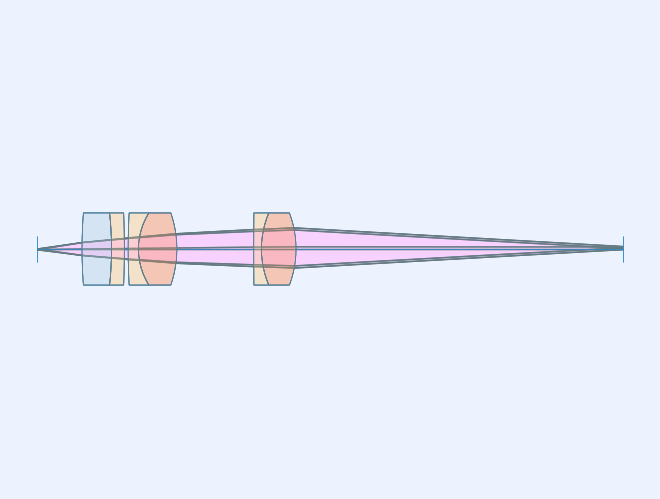

In [1]:
%matplotlib inline

from rayoptics.environment import *

# Create a new optical model
opm = OpticalModel()

sm = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']
em = opm['ele_model']
pt = opm['part_tree']

sm.gaps[0].thi = 3.5 #Working distance

sm.do_apertures = False # Disable automatic aperture calculation

opm.add_from_file("./lens-data/CODV_45345.seq", t=0.3) #6.25mm Dia. x 60mm FL, MgF2 Coated, Achromatic Doublet Lens

opm.add_from_file("./lens-data/CODV_32299.seq", t=6) #6.25mm Dia. x 12.5mm FL, MgF2 Coated, Achromatic Doublet Lens

opm.add_from_file("./lens-data/CODV_32301.seq", t=25.503) #6.25mm Dia. x 15mm FL, MgF2 Coated, Achromatic Doublet Lens


ce1 = pt.obj_by_name('CE1')

ce2 = pt.obj_by_name('CE2')
opm.flip(ce2)

ce3 = pt.obj_by_name('CE3')
opm.flip(ce3)

opm.update_model()

em.list_model()
sm.list_model()
pt.list_model()

# Visualize the complete system
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

In [2]:
pm.first_order_data()

efl               9.787
f                 9.787
f'                9.787
ffl              0.2698
pp1               10.06
bfl               1.898
ppk               -7.89
pp sep           -1.247
f/#               9.087
m                -2.596
red             -0.3852
obj_dist            3.5
obj_ang               1
enp_dist             -0
enp_radius          0.5
na obj           0.1429
n obj                 1
img_dist          27.31
img_ht           0.1586
exp_dist          358.8
exp_radius        18.14
na img         -0.05502
n img                 1
optical invariant     0.008728
